# Introduction to Portfolio Theory: Risk Measures #

In [24]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Statistics
from scipy.stats import norm

# Import Data
import yfinance as yf

# Handle Files
import sys
import os

# Import Local Functions
sys.path.append(os.path.abspath("../source"))
from functions import import_financial_data

# Visualization
import matplotlib.pyplot as plt

In [25]:
# Import Data

df_amzn = import_financial_data("AMZN", starting_year='2020')
df_nvda = import_financial_data("NVDA", starting_year='2020')
df_tsla = import_financial_data("TSLA", starting_year='2020')

# Create the data we are going to use
data = pd.DataFrame()

data['AMZN'] = df_amzn['adj_close']
data['NVDA'] = df_nvda['adj_close']
data['TSLA'] = df_tsla['adj_close']

data

,AMZN,NVDA,TSLA
Date,,,
2020-01-02,94.9005,5.99775,28.683971
2020-01-03,93.7485,5.90175,29.533970
2020-01-06,95.1440,5.92650,30.102637
2020-01-07,95.3430,5.99825,31.270635
2020-01-08,94.5985,6.00950,32.809301
...,...,...,...
2024-10-22,189.7000,143.59000,217.970000
2024-10-23,184.7100,139.56000,213.650000
2024-10-24,186.3800,140.41000,260.480000


In [26]:
# Calculate Logarithmic Returns

log_returns = np.log(data / data.shift(1)).dropna()

log_returns

,AMZN,NVDA,TSLA
Date,,,
2020-01-03,-0.012213,-0.016135,0.029203
2020-01-06,0.014776,0.004185,0.019072
2020-01-07,0.002089,0.012034,0.038067
2020-01-08,-0.007839,0.001874,0.048033
2020-01-09,0.004788,0.010923,-0.022189
...,...,...,...
2024-10-22,0.003327,-0.000835,-0.004029
2024-10-23,-0.026657,-0.028467,-0.020018
2024-10-24,0.009001,0.006072,0.198187


In [27]:
# 1. Annualized Volatility (Standard Deviation)

volatility = log_returns.std() * np.sqrt(252)

print("Annualized Volatility:")
print(volatility)

Annualized Volatility:
AMZN    0.360775
NVDA    0.540347
TSLA    0.668595
dtype: float64


In [28]:
# 1.5 Annualized Variance (Standard Deviation)

variance = log_returns.var() * 252

print("Anualized Variance:")
print(variance)

Anualized Variance:
AMZN    0.130158
NVDA    0.291975
TSLA    0.447019
dtype: float64


In [29]:
# 2. Covariance Matrix
covariance = log_returns.cov() * 252  # Anualized

print("\nCovariance Matrix:")
print(covariance)


Covariance Matrix:
          AMZN      NVDA      TSLA
AMZN  0.130158  0.115055  0.105861
NVDA  0.115055  0.291975  0.175987
TSLA  0.105861  0.175987  0.447019


In [30]:
# 3. Correlations
correlations = log_returns.corr()

print("\nCorrelation Matrix:")
print(correlations)


Correlation Matrix:
          AMZN      NVDA      TSLA
AMZN  1.000000  0.590198  0.438869
NVDA  0.590198  1.000000  0.487131
TSLA  0.438869  0.487131  1.000000


In [31]:
# 4. Value at Risk

confidence_level = 0.95

z_score = norm.ppf(1 - confidence_level)

VaR_95 = log_returns.mean() + z_score * log_returns.std()
VaR_95 = VaR_95 * np.sqrt(252)  # Anualized
print("\nAnualized Value at Risk (VaR) at 95% confidence level:")
print(VaR_95)



Anualized Value at Risk (VaR) at 95% confidence level:
AMZN   -0.584448
NVDA   -0.847515
TSLA   -1.070767
dtype: float64


In [32]:
# Download the SPY (benchmark)
# S&P500
benchmark = yf.download('^GSPC', start='2020-01-01', end='2025-01-01', interval='1d', auto_adjust=True)
benchmark.dropna(inplace=True)

benchmark

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2020-01-02,3257.850098,3258.139893,3235.530029,3244.669922,3459930000
2020-01-03,3234.850098,3246.149902,3222.340088,3226.360107,3484700000
2020-01-06,3246.280029,3246.840088,3214.639893,3217.550049,3702460000
2020-01-07,3237.179932,3244.909912,3232.429932,3241.860107,3435910000
2020-01-08,3253.050049,3267.070068,3236.669922,3238.590088,3726840000
...,...,...,...,...,...
2024-12-24,6040.040039,6040.100098,5981.439941,5984.629883,1757720000
2024-12-26,6037.589844,6049.750000,6007.370117,6024.970215,2904530000


In [33]:
# Calculate the benchmark returns

benchmark_rets = np.log(benchmark['Close'] / benchmark['Close'].shift(1)).dropna()

# Reindex
benchmark_rets = benchmark_rets.reindex(log_returns.index)

benchmark_rets

Ticker,^GSPC
Date,
2020-01-03,-0.007085
2020-01-06,0.003527
2020-01-07,-0.002807
2020-01-08,0.004890
2020-01-09,0.006633
...,...
2024-10-22,-0.000475
2024-10-23,-0.009234
2024-10-24,0.002143


In [34]:
# Calculate the Excess Returns

excess_return = log_returns.subtract(benchmark_rets.squeeze(), axis=0)

excess_return

,AMZN,NVDA,TSLA
Date,,,
2020-01-03,-0.005128,-0.009051,0.036288
2020-01-06,0.011249,0.000658,0.015545
2020-01-07,0.004897,0.014841,0.040874
2020-01-08,-0.012730,-0.003017,0.043142
2020-01-09,-0.001845,0.004290,-0.028823
...,...,...,...
2024-10-22,0.003802,-0.000360,-0.003554
2024-10-23,-0.017423,-0.019234,-0.010784
2024-10-24,0.006857,0.003929,0.196043


In [35]:
# Now calculate the Tracking Error (which is the Std of the Excess Returns)

tracking_error = excess_return.std() * np.sqrt(252)

print("\nTracking Error:")
print(tracking_error)


Tracking Error:
AMZN    0.276739
NVDA    0.417135
TSLA    0.588665
dtype: float64


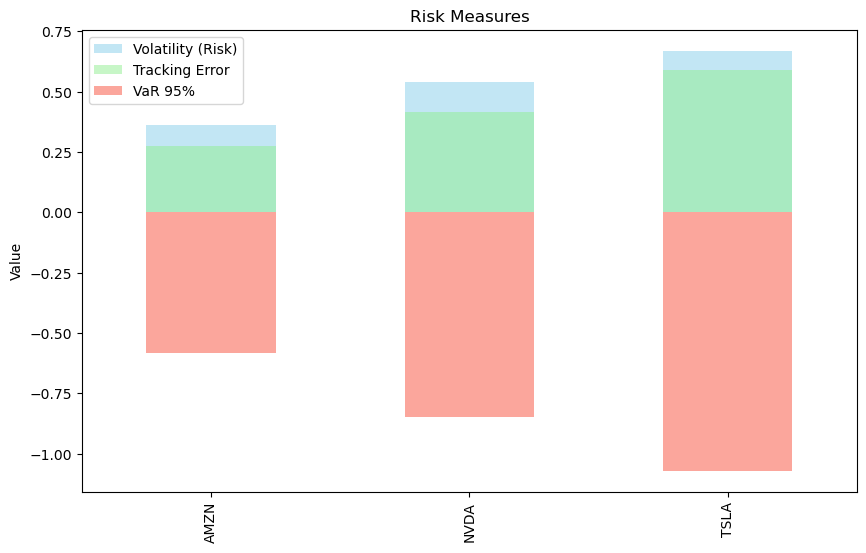

In [36]:
#Let us visualize the Risk Measures

fig, ax = plt.subplots(figsize=(10, 6))
volatility.plot(kind='bar', color='skyblue', label='Volatility (Risk)', alpha=0.5)
tracking_error.plot(kind='bar', color='lightgreen', label='Tracking Error', alpha=0.5)
VaR_95.plot(kind='bar', color='salmon', label='VaR 95%', alpha=0.7)
plt.title('Risk Measures')
plt.ylabel('Value')
plt.legend()
plt.show()

In [37]:
# Tesla seems more riskier than Amazon

mean = log_returns.mean() * 252

print("Annualized Mean Returns:")
print(mean)

Annualized Mean Returns:
AMZN    0.142451
NVDA    0.655234
TSLA    0.459947
dtype: float64


In [38]:
# Risk Adjusted Returns

eff_ratio = mean/volatility

print("Risk Adjusted Returns:")
print(eff_ratio)

Risk Adjusted Returns:
AMZN    0.394847
NVDA    1.212618
TSLA    0.687931
dtype: float64


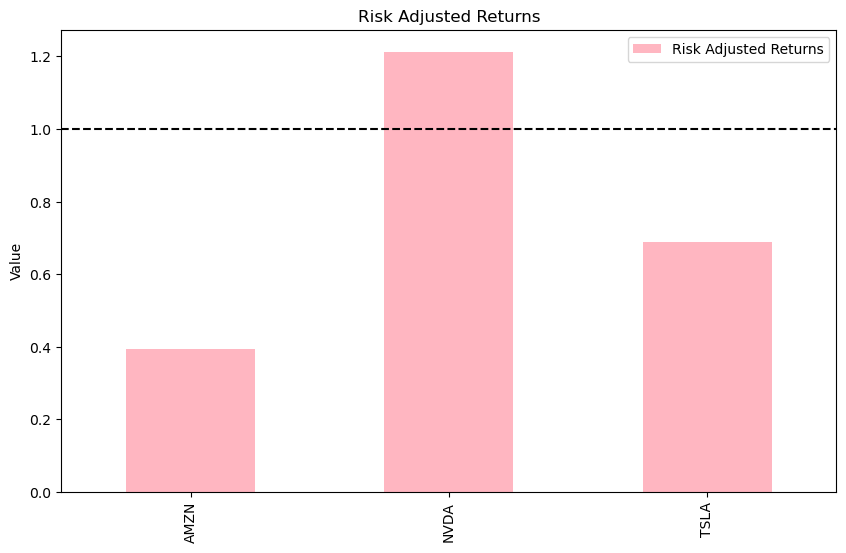

In [39]:
#Let us visualize

fig, ax = plt.subplots(figsize=(10, 6))
eff_ratio.plot(kind='bar', color='lightpink', label='Risk Adjusted Returns')
ax.axhline(y=1, color='black', linestyle='--')
plt.title('Risk Adjusted Returns')
plt.ylabel('Value')
plt.legend()
plt.show()

In [42]:
# Calculate the Risk Adjusted Returns of the Benchmark (Risk Aversion Coefficient)

mean_bench = benchmark_rets.mean() * 252

var_bench = benchmark_rets.var() * 252

eff_rate_bench = mean_bench/var_bench

eff_rate_bench.values[0]

2.572389830601336